# Makine Öğrenmesi

* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)
* [Basit Doğrusal Regresyon](#basit_dogrusal_reg)

# Basit Doğrusal Regresyon <a id="basit_dogrusal_reg" />

Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

Anakitle teorik gösterim:  Y = ß0 + ß1X + ε

Örneklem gerçek değerler:  yi = b0 + b1xi + ei

Tahmin Modeli:  ýi = b0 + b1xi
		
			ß0 = Doğrunun eksenini kestiği nokta
			ß1 = Doğrunun eğimi
			ε  = Hata terimi
            
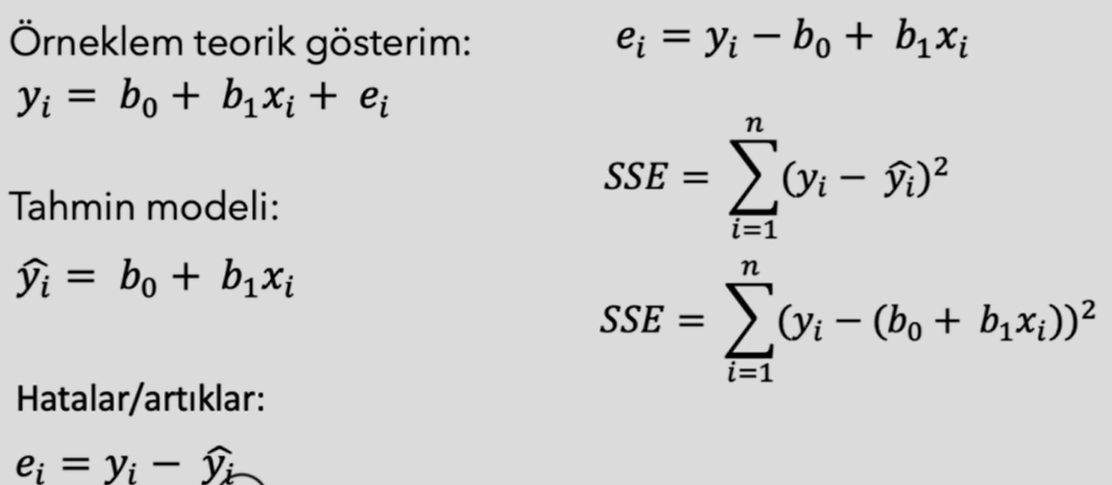

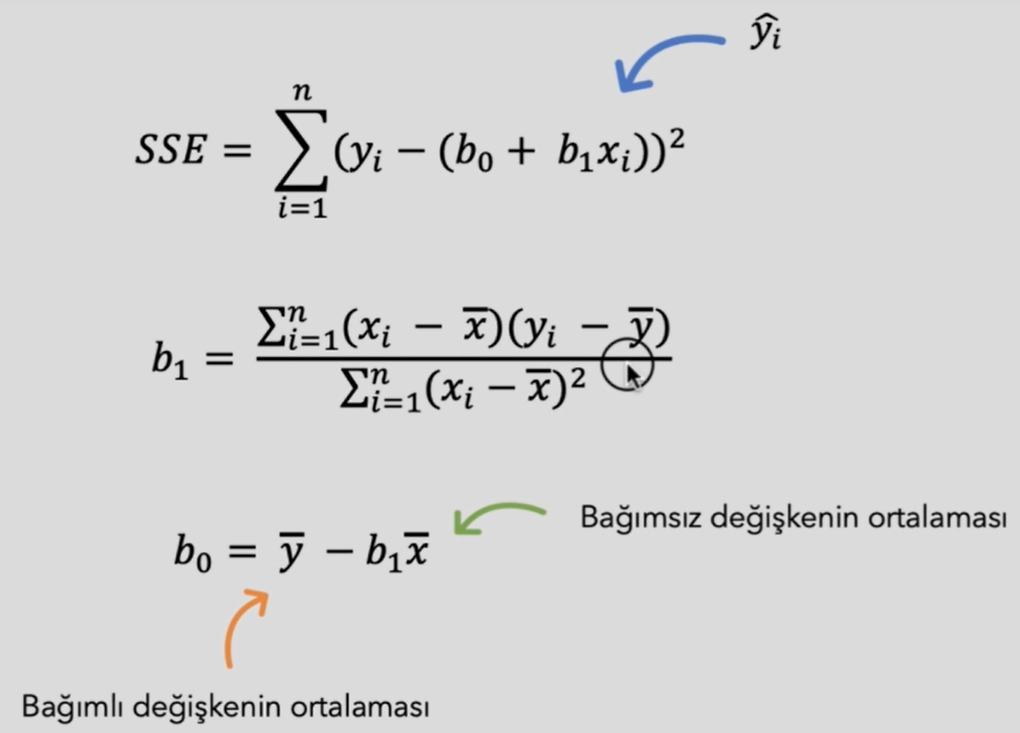

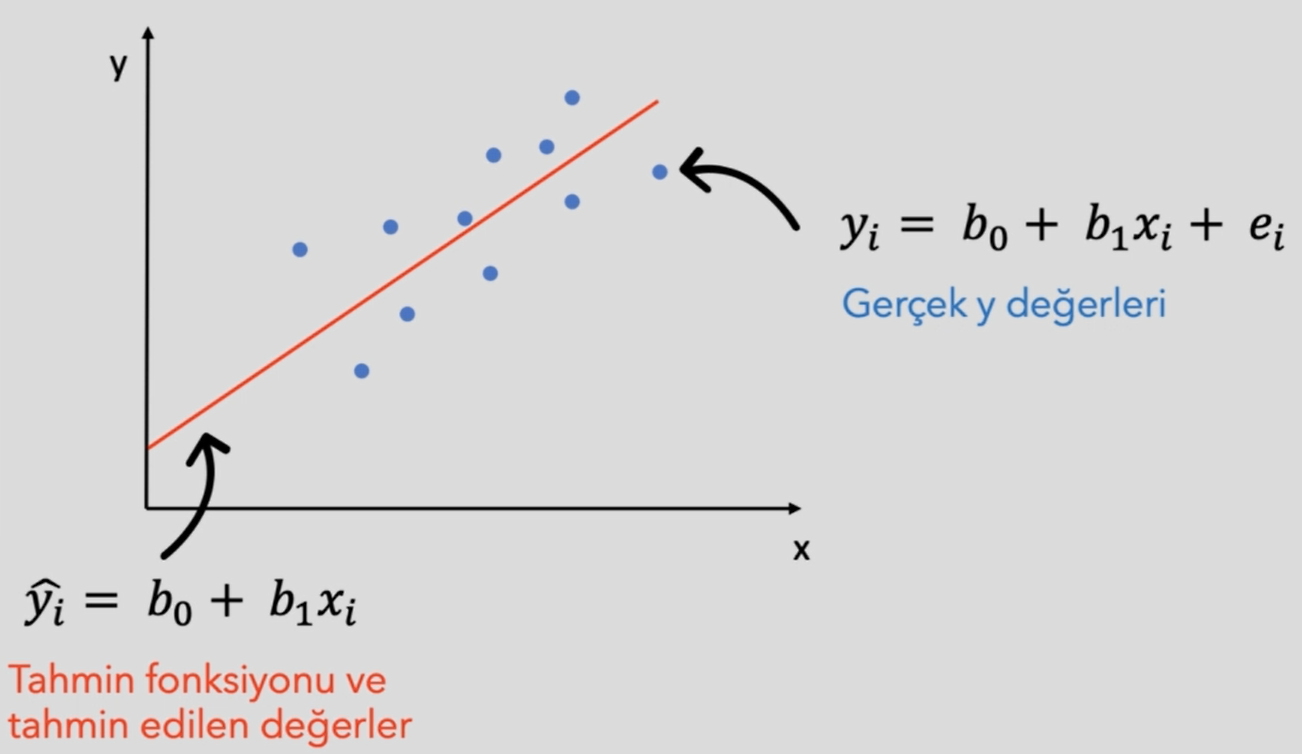

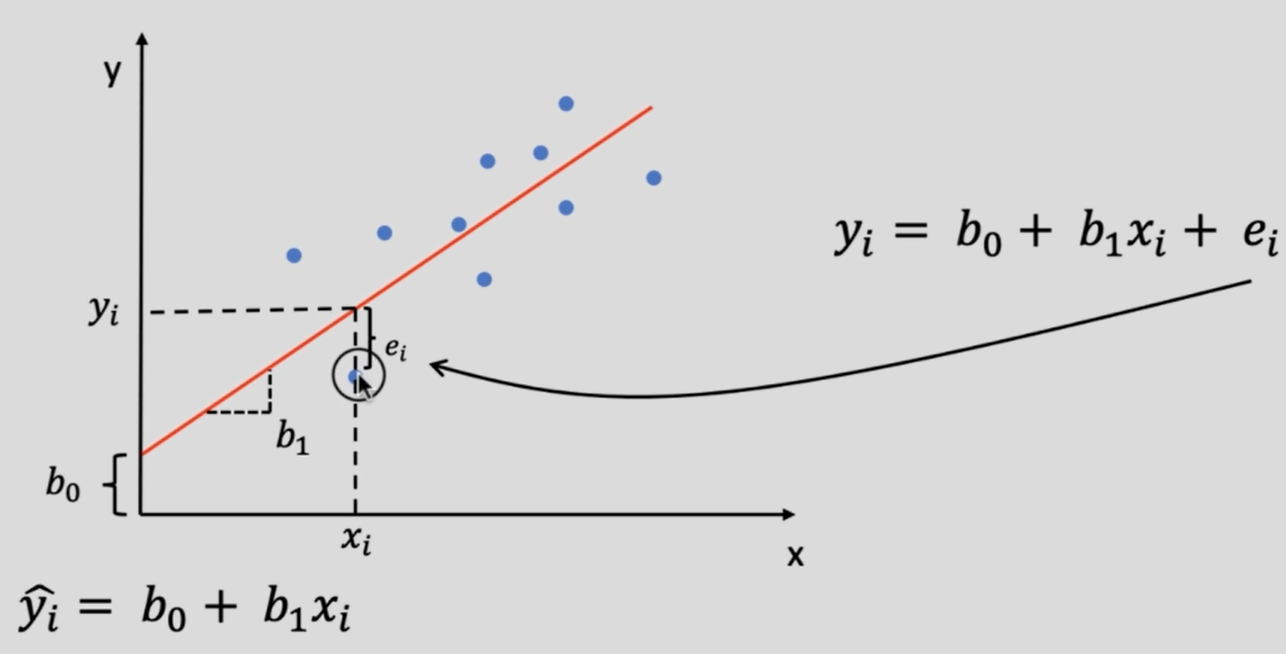

In [1]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [2]:
df = df.iloc[:, 1:len(df)]

In [3]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [8]:
import seaborn as sns
sns.pairplot(df, kind='reg')

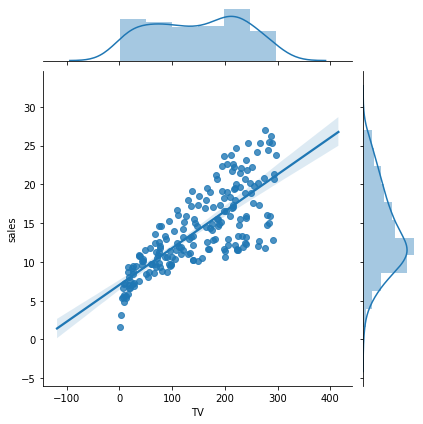

In [9]:
sns.jointplot(x = 'TV', y = 'sales', data = df, kind = 'reg');

### Statsmodels ile modelleme

In [10]:
import statsmodels.api as sm

In [11]:
X = df[["TV"]]
X[0:5]

TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8

In [12]:
X = sm.add_constant(X)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
X[0:5]

const     TV
0    1.0  230.1
1    1.0   44.5
2    1.0   17.2
3    1.0  151.5
4    1.0  180.8

In [14]:
y = df['sales']

In [15]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
lm = sm.OLS(y, X)

In [17]:
model = lm.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        05:29:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

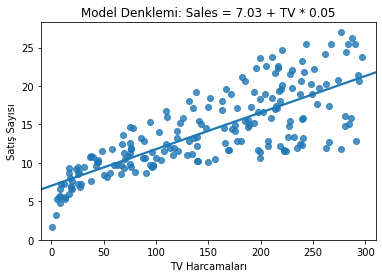

In [19]:
import matplotlib.pyplot as plt
g = sns.regplot(df['TV'], df['sales'], ci=None)
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel('TV Harcamaları')
plt.xlim(-10, 310)
plt.ylim(bottom=0);

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_ # katsayi
model.coef_ # b

array([0.04753664])

In [22]:
model.score(X, y) # r2 değeri

0.611875050850071

In [23]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

### Tahmin

Model denklemi : 
    
    Sales = 7.03 + TV*0.04
    
    Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur? 

In [24]:
7.03 + 30*0.04

8.23

In [25]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X, y)

In [26]:
model.predict([[30]])

array([8.45869276])

In [27]:
yeni_veri = [[5], [90], [200]]

In [28]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Çoklu Doğrusal Regresyon

Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.  

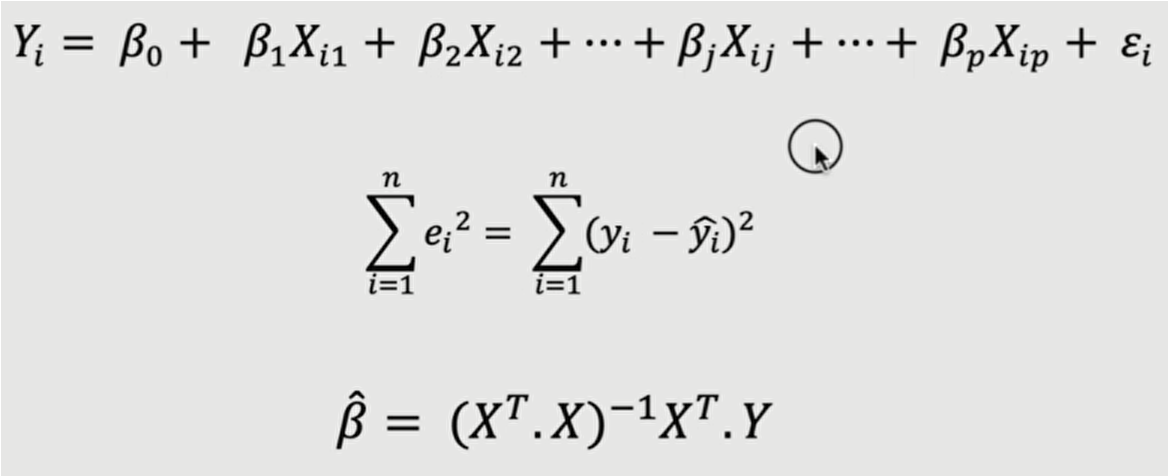

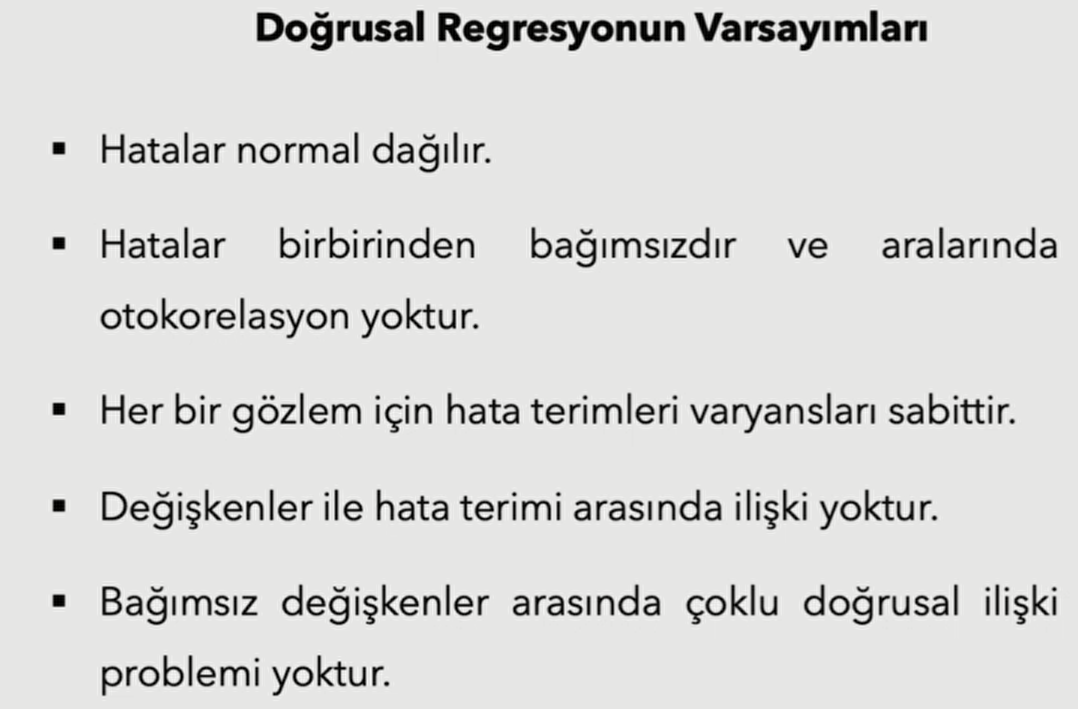

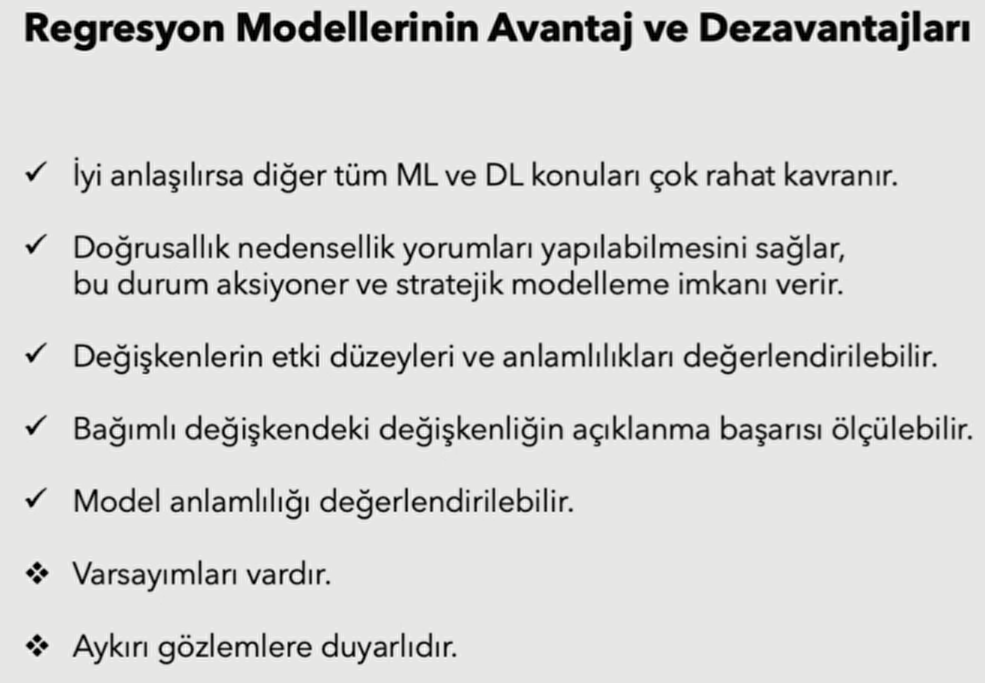

In [29]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols=[1, 2, 3, 4])
df = ad.copy()
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [31]:
X = df.drop("sales", axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [32]:
X_train.shape

(160, 3)

In [33]:
y_train.shape

(160,)

In [34]:
X_test.shape

(40, 3)

In [35]:
training = df.copy()

In [36]:
training.shape

(200, 4)

### Statsmodels

In [37]:
lm = sm.OLS(y_train, X_train)

In [38]:
model = lm.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                   1.28e-137
Time:                        05:29:31   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [41]:
model.intercept_

2.979067338122629

In [42]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

### Tahmin

Model Denklemi ; 

Sales = 2.97 + TV*0.04 + radio*0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcaması, 40 birim de gazete harcaması olduğunda tahmini değer ne olur? 

In [43]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [44]:
model.predict(yeni_veri)

array([6.32334798])

# PCR - Temel Bileşen Regresyonu

Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır. 

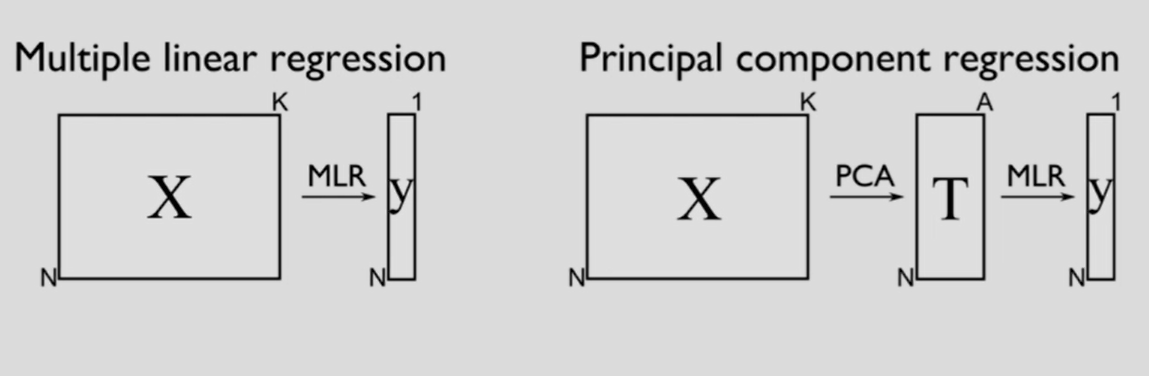

In [45]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

In [46]:
hit.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [48]:
df.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

In [49]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [50]:
y = df['Salary']

In [51]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [52]:
X_.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  
1  321.0  414.0   375.0    632.0     43.0    10.0  
2  224.0  266.0   263.0    880.0     82.0    14.0  
3  828.0  838.0   354.0    200.0     11.0     3.0  
4   48.0   46.0    33.0    805.0     40.0     4.0  
5  501.0  336.0   194.0    282.0    421.0    25.0

In [53]:
X = pd.concat([X_, dms[["League_N", "Division_W", 'NewLeague_N']]], axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

training = df.copy()
print("training: ", training.shape)

X_train:  (197, 19)
y_train:  (197,)
X_test:  (66, 19)
y_test:  (66,)
training:  (263, 20)


In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [56]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [57]:
X_reduced_train[0:1, :]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [58]:
import numpy as np
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [59]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [60]:
pcr_model.intercept_

543.4834416243655

In [61]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

### Tahmin

In [62]:
y_pred = pcr_model.predict(X_reduced_train)

In [63]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

## PLS - Kısmi En Küçük Kareler Regresyonu

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır. 

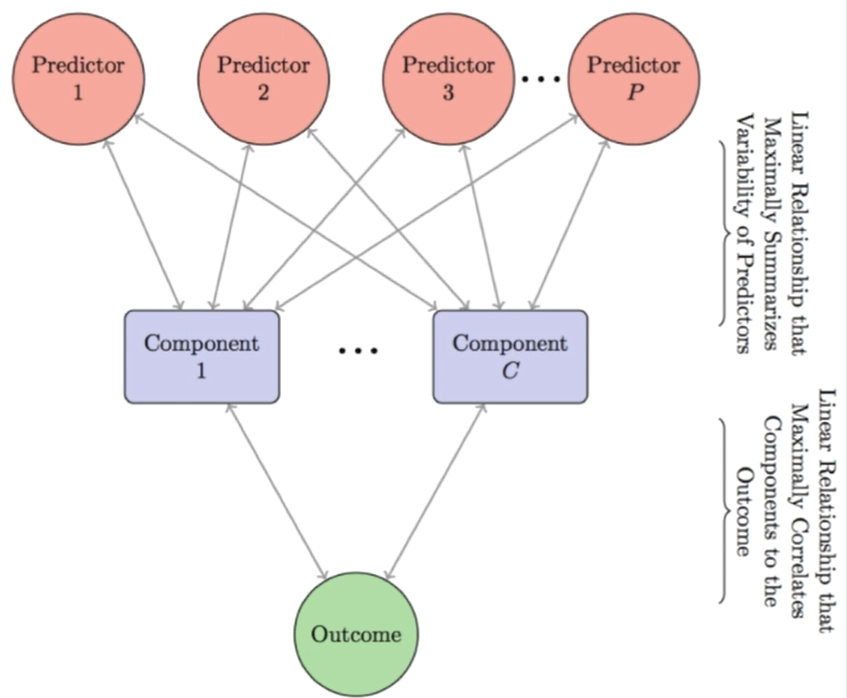

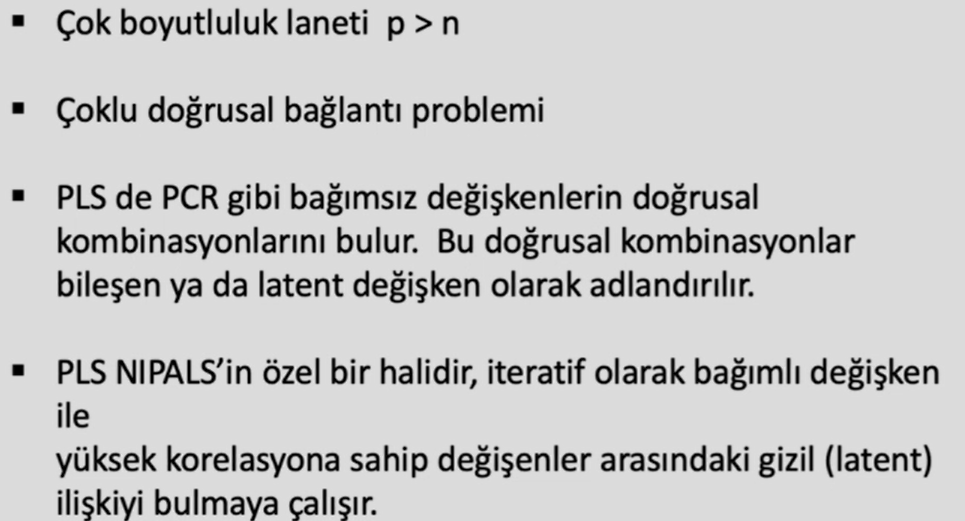

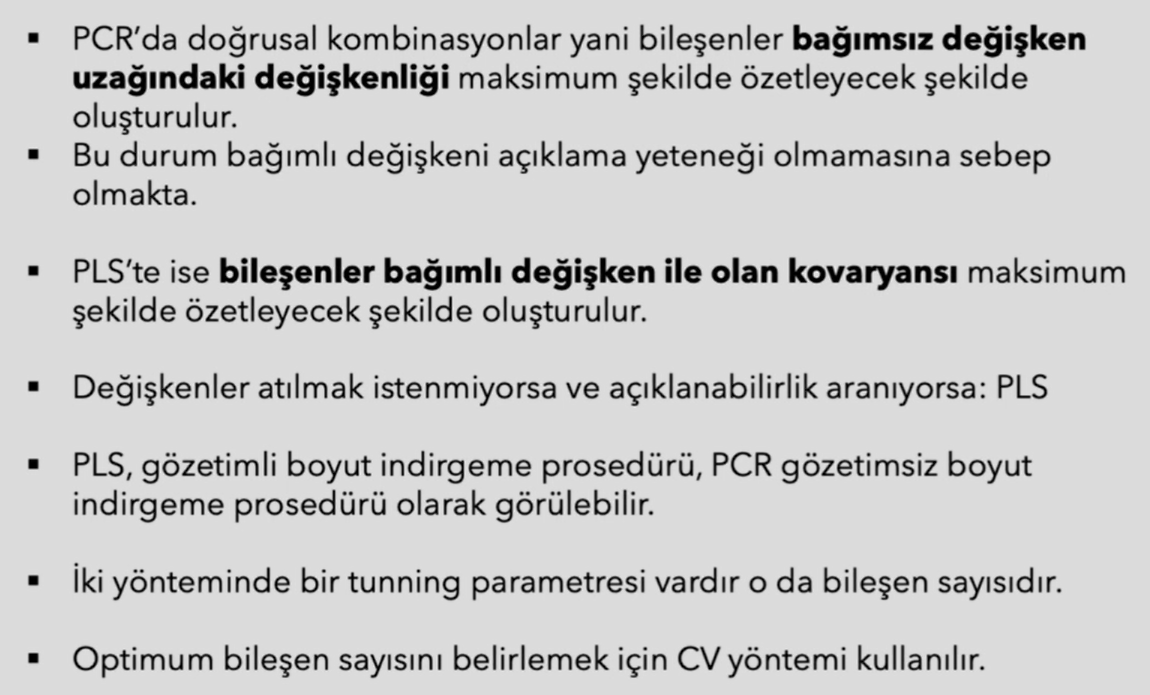

In [64]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [65]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [66]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [67]:
y_pred = pls_model.predict(X_train)[0:10]

## Ridge Regresyon

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.

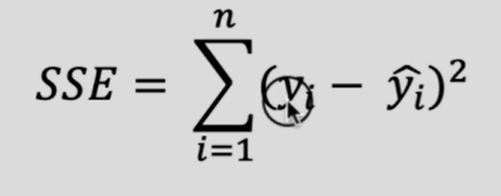

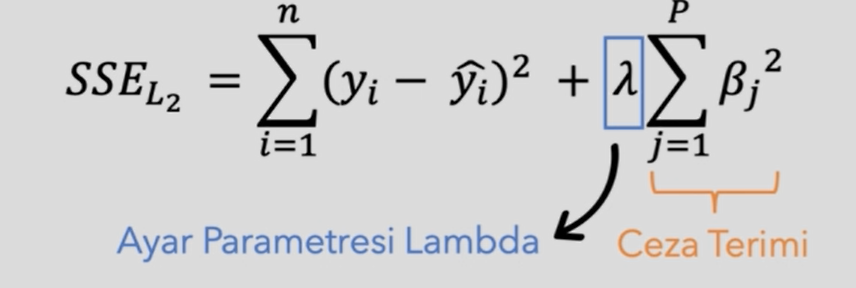

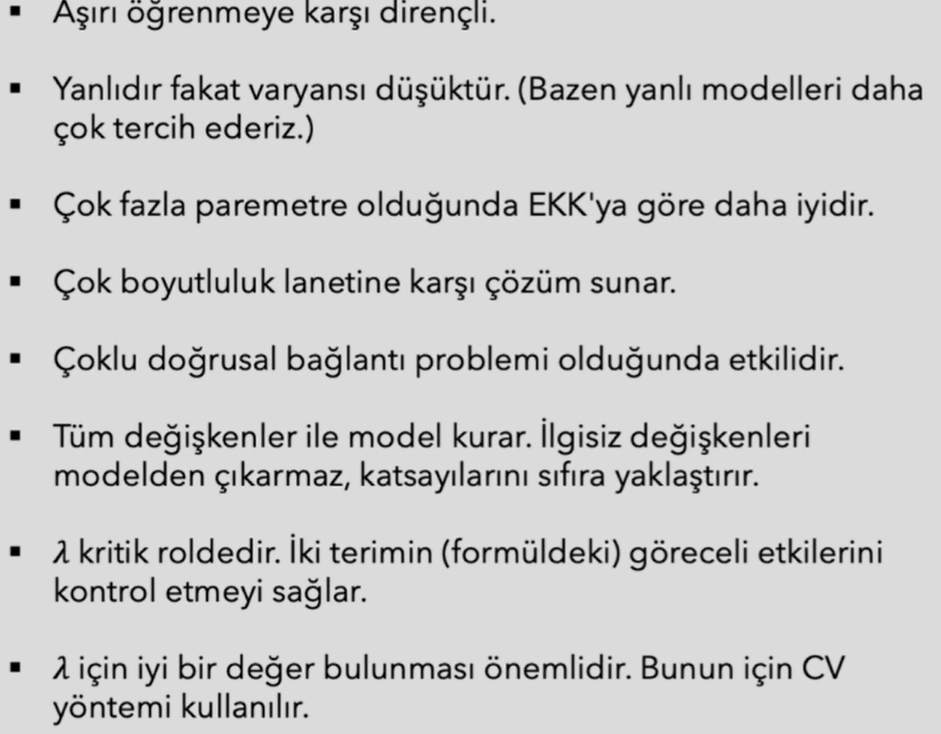

In [68]:
from sklearn.linear_model import Ridge

In [69]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [70]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Düzenlileştirmenin bir fonksiyonu olarak Ridge Katsayıları')

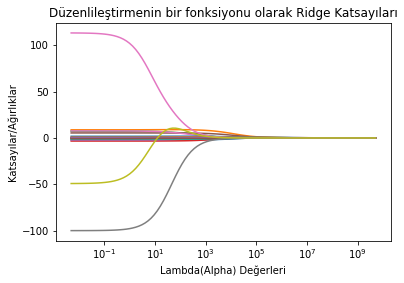

In [72]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title("Düzenlileştirmenin bir fonksiyonu olarak Ridge Katsayıları")

In [73]:
y_pred = ridge_model.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828434

# Lasso Regresyon

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. 

Ridge ile farkı: Bu katsayılara ceza uygulama işini abartarak katsayıların cezalarını onları sıfır yapacak şekilde uygulamaktadır. Bu şekilde değişken seçimi yapmaktadır.

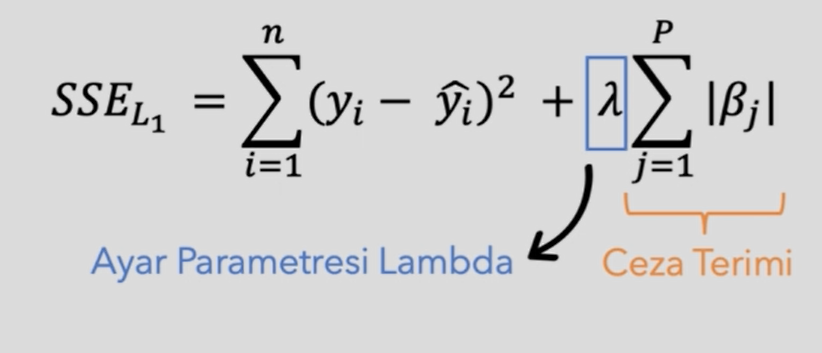

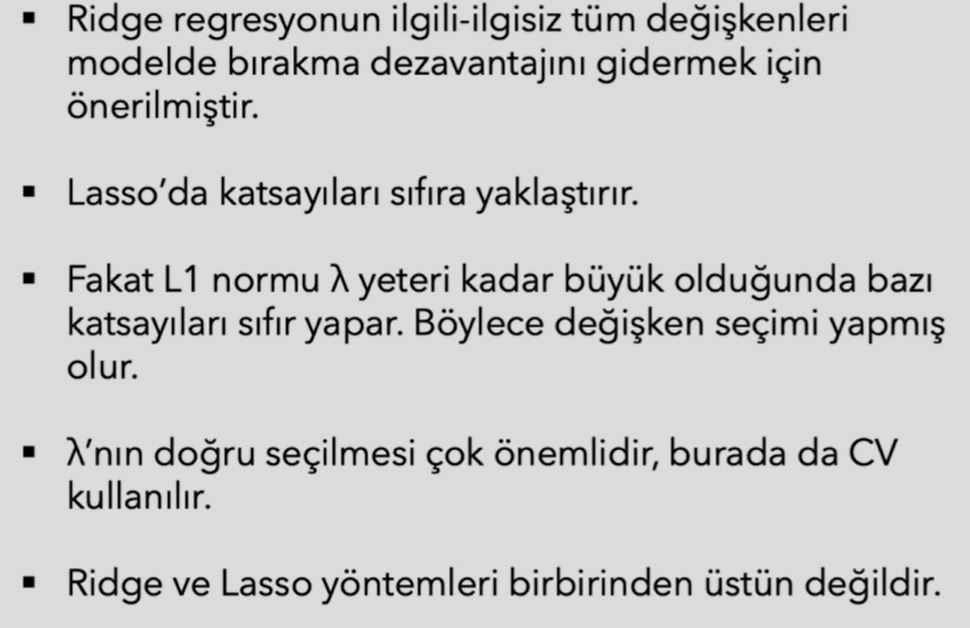

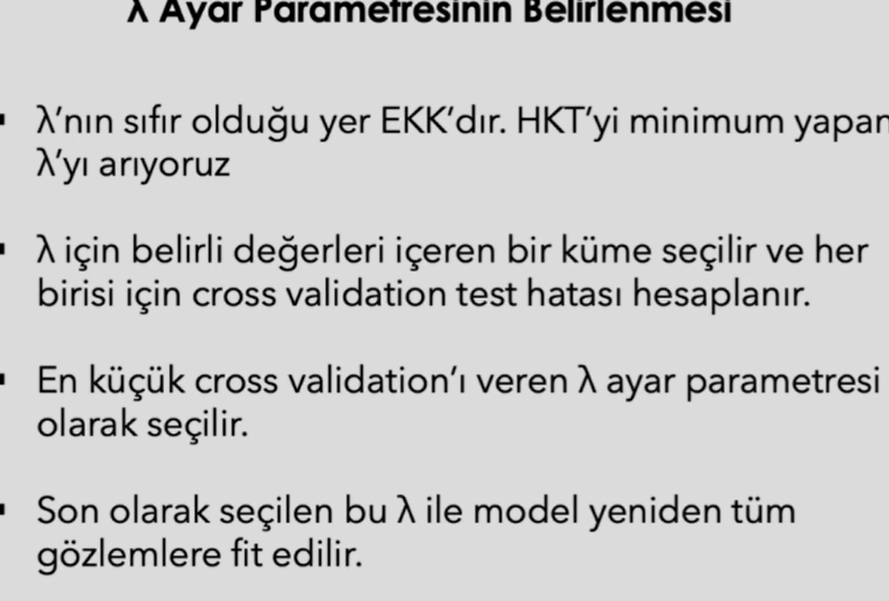

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388096, tolerance: 3898.686956380658
  positive)


In [78]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
lasso_model.coef_


array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774935673922, tolerance: 3898.686956380658


Text(0.5, 1.0, 'Düzenlileştirmenin bir fonksiyonu olarak Ridge Katsayıları')

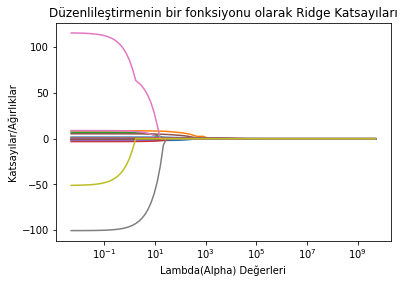

In [80]:
lasso = Lasso()
lambdalar = 10**np.linspace(10, -2, 100)*0.5
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title("Düzenlileştirmenin bir fonksiyonu olarak Ridge Katsayıları")

In [81]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [82]:
y_pred = lasso_model.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

## Model Tuning

In [84]:
from sklearn.linear_model import LassoCV

In [85]:
lasso_cv_model = LassoCV(alphas=None, cv=10, max_iter=10000, normalize=True)

In [86]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [87]:
lasso_cv_model.alpha_

0.39406126432470073

In [88]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [89]:
lasso_tuned.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523985, tolerance: 3898.686956380658
  positive)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
y_pred = lasso_tuned.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

# ElasticNet Regression

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. ElasticNet L1 ve L2 yaklaşımlarını birleştirir.

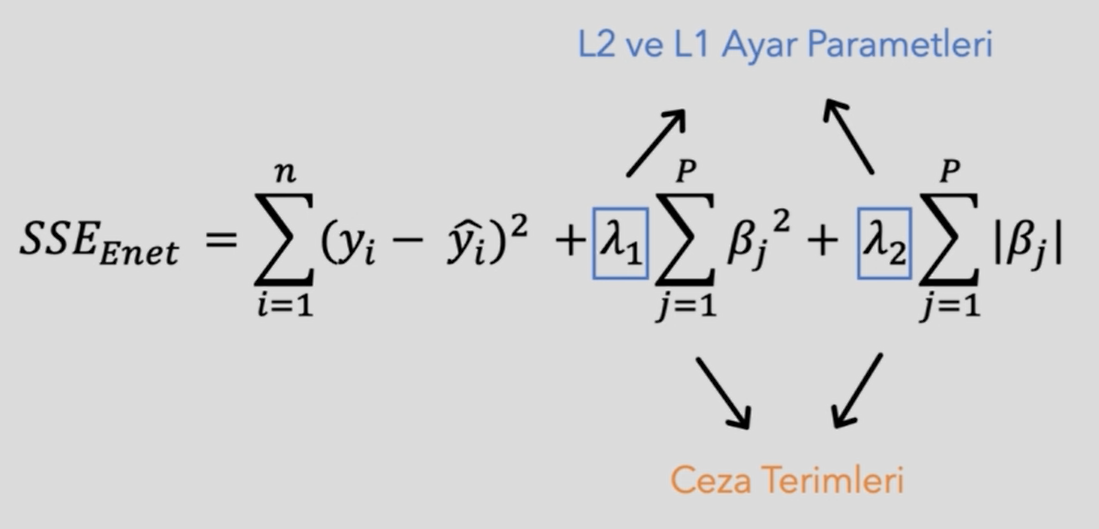

In [92]:
from sklearn.linear_model import ElasticNet

In [93]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [94]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [95]:
enet_model.intercept_

-6.465955602113127

In [96]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [97]:
y_pred = enet_model.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y_test, y_pred)

0.41070222469326945

In [101]:
from sklearn.linear_model import ElasticNetCV

In [102]:
enet_cv_model = ElasticNetCV(cv=10, random_state=0).fit(X_train, y_train)

In [103]:
enet_cv_model.alpha_

5230.7647364798695

In [104]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train, y_train)

In [105]:
y_pred = enet_tuned.predict(X_test)

In [106]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795